<a href="https://colab.research.google.com/github/hyemworks/make-your-firstGAN-with-pytorch/blob/main/ch03_performance_improvement_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Chapter 03 &nbsp;&nbsp;&nbsp;&nbsp; Performance Improvement Techniques

In [1]:
# mount Drive to access data files

from google.colab import drive
drive.mount('./mount')

Mounted at ./mount


In [4]:
# import pandas to read *.csv files

import pandas

df = pandas.read_csv("mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/mnist_data/mnist_train.csv", header = None)

In [5]:
# import matplotlib to show img

import matplotlib.pyplot as plt

In [7]:
# import torch

import torch
import torch.nn as nn

In [35]:
class Classifier(nn.Module): # inheritance


    # Constructor
    def __init__(self):

        # Î∂ÄÎ™® ÌÅ¥ÎûòÏä§ Ï¥àÍ∏∞Ìôî
        super().__init__()

        # Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥ Ï†ïÏùò - ÌÜµÍ≥ºÏãúÌÇ¨ Î†àÏù¥Ïñ¥Î•º ÏàúÏÑúÎåÄÎ°ú Í∏∞Ïà†
        self.model = nn.Sequential(
            nn.Linear(784, 200),    # Linear : ÏôÑÏ†ÑÏó∞Í≤∞ Îß§ÌïëÏùÑ ÏùòÎØ∏ => Ïó¨Í∏∞ÏóêÏÑúÎäî ÌõàÎ†® Ïãú ÎÖ∏ÎìúÎ•º ÏóÖÎç∞Ïù¥Ìä∏Ìï† Í∞ÄÏ§ëÏπòÏóê ÎåÄÌïú Ï†ïÎ≥¥ÎèÑ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏùå
            # nn.Sigmoid(),
            nn.LeakyReLU(0.02),

            nn.LayerNorm(200),

            nn.Linear(200, 10),     # Linear : ,,
            nn.Sigmoid()
            # nn.LeakyReLU(0.02)
        )

        # Loss Function ÏÑ§Ï†ï
        # self.loss_function = nn.MSELoss()
        self.loss_function = nn.BCELoss()

        # Optimizer ÏÑ§Ï†ï
        # self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        self.optimizer = torch.optim.Adam(self.parameters())

        # ÌõàÎ†® ÏãúÍ∞ÅÌôî (train Ìï®ÏàòÏóêÏÑú ÏÇ¨Ïö©Îê† Î≥ÄÏàò Ï¥àÍ∏∞Ìôî)
        self.counter = 0
        self.progress = []



    # forward function : ÎÑ§Ìä∏ÏõåÌÅ¨Ïóê Ï†ïÎ≥¥ Ï†ÑÎã¨
    def forward(self, inputs):
        # Î™®Îç∏ Ïã§Ìñâ
        return self.model(inputs)


      
    # train
    def train(self, inputs, targets):
        # inputs  : Ïã†Í≤ΩÎßùÏóê Ï†ÑÎã¨Ìï† ÏûÖÎ†•  
        # targets : ÏõêÌïòÎäî Î™©Ìëú --> Ïù¥Î•º ÌÜµÌï¥ ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞

        ### Ïã†Í≤ΩÎßù Ï∂úÎ†• Í≥ÑÏÇ∞
        outputs = self.forward(inputs)  # train Ìï®ÏàòÏóêÏÑú Í∞ÄÏû• Î®ºÏ†Ä Ìï¥ÏïºÌï† Ïùº! == forward()Î°ú ÏûÖÎ†•Í∞íÏùÑ Ïã†Í≤ΩÎßùÏóê Ï†ÑÎã¨ÌïòÏó¨ Í≤∞Í≥ºÎ•º ÏñªÏñ¥ÎÇ¥Îäî Í≤É
        
        ### ÏÜêÏã§ Í≥ÑÏÇ∞
        loss = self.loss_function(outputs, targets)
        #  Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÏùò ÎßàÏßÄÎßâ ÎÖ∏ÎìúÎäî ÏÜêÏã§Ìï®Ïàò!
        #   => ÏÜêÏã§ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ Í∞Å ÎÖ∏ÎìúÏóêÏÑú Í∏∞Ïö∏Í∏∞Í∞Ä Î≥ÄÌïòÎäî Í≤ÉÏùÄ Í∞Å ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞Í∞Ä Î≥ÄÌï† ÎïåÎßàÎã§ ÏÜêÏã§Ïù¥ Î≥ÄÌïòÎäî Í≤ÉÍ≥º Í∞ôÏùå
        

        ### ÌõàÎ†® ÏãúÍ∞ÅÌôî (Î™®ÎãàÌÑ∞ÎßÅ)
        # Ïπ¥Ïö¥ÌÑ∞Î•º Ï¶ùÍ∞ÄÏãúÌÇ§Í≥† 10ÌöåÎßàÎã§ Ïò§Ï∞® Ï†ÄÏû•
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item()) # item() : ÌÖêÏÑúÏóêÏÑú Í∞íÏùÑ Í∫ºÎÇ¥Ïò§Îäî Ìï®Ïàò
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)


        ### ÏÜêÏã§ÏùÑ ÏÇ¨Ïö©Ìï¥ ÎÑ§Ìä∏ÏõåÌÅ¨Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏
        # Í∏∞Ïö∏Í∏∞ Ï¥àÍ∏∞Ìôî
        self.optimizer.zero_grad()  # Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÏùò Í∏∞Ïö∏Í∏∞Í∞Ä Î™®Îëê 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
                                    #   : Ïã†Í≤ΩÎßùÏùÑ ÌõàÎ†®Ìï† ÎïåÎßàÎã§ Îß§Î≤à Í∏∞Ïö∏Í∏∞Îäî 0ÏúºÎ°ú ÏÑ§Ï†ïÎêòÏñ¥ ÏûàÏñ¥Ïïº Ìï®
                                    #      => Í∑∏Î†áÍ≤å ÌïòÏßÄ ÏïäÏúºÎ©¥ loss.backward()Î•º Îî∞Îùº Í≥ÑÏÇ∞ÎßàÎã§ ÏåìÏù¥Í≤å Îê®
        # Ïó≠Ï†ÑÌåå Ïã§Ìñâ
        loss.backward()
        # Í∞ÄÏ§ëÏπò Í∞±Ïã†
        self.optimizer.step()


  
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
    

In [10]:
from torch.utils.data import Dataset

In [12]:
# MNIST DATASET CLASS

class MnistDataset(Dataset):

  # Constructor
  def __init__(self, csv_file):
    # csv_file ÏùΩÏñ¥Ïò§Í∏∞
    self.data_df = pandas.read_csv(csv_file, header=None)


  def __len__(self):
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùò Í∏∏Ïù¥ Î∞òÌôò
    return len(self.data_df)


  # ÌäπÏ†ï ÏïÑÏù¥ÌÖúÏùÑ Ïù∏Îç±Ïä§Î•º ÌÜµÌï¥ Ï†ëÍ∑ºÍ∞ÄÎä•Ìïú Ìï®Ïàò
  def __getitem__(self,index):
    # Ïù¥ÎØ∏ÏßÄ (Î™©Ìëú)Î†àÏù¥Î∏î
    label = self.data_df.iloc[index,0]  # Í∞Å ÌñâÏùò Ï≤´Î≤àÏß∏ Ïù∏Îç±Ïä§, Ï¶â Ï†ïÎãµÎ†àÏù¥Î∏îÏùÑ ÏùΩÏñ¥Ïò¥.(Ï†ïÎãµÏùÄ 0~9ÍπåÏßÄ Ï°¥Ïû¨)
    target = torch.zeros((10))          # targetÏù¥ÎûÄ "Ï†ïÎãµ" Ï¢ÖÏù¥ ÎßåÎì§Í∏∞
    target[label] = 1.0                 # Ï†ïÎãµ Î†àÏù¥Î∏îÏùò ÏúÑÏπòÏóêÎßå 1Î°ú ÏßÄÏ†ï. ÎÇòÎ®∏ÏßÄÎäî 0 (Ïõê-Ìï´ Ïù∏ÏΩîÎî© Î∞©Ïãù)

    # 0 - 255Ïùò Ïù¥ÎØ∏ÏßÄÎ•º 0 - 1Î°ú Ï†ïÍ∑úÌôî
    image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values)/255.0

    # Î†àÏù¥Î∏î, Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ ÌÖêÏÑú, Î™©Ìëú ÌÖêÏÑú Î∞òÌôò
    return label, image_values, target



  # MNIST Îç∞Ïù¥ÌÑ∞ÏÖã ÎÇ¥Ïùò ÌäπÏ†ï Ïù¥ÎØ∏ÏßÄÎ•º Í≥®Îùº Ï∞®Ìä∏Î•º Í∑∏Î†§Î≥¥Îäî Î©îÏÑúÎìú
  def plot_image(self, index):
    img = self.data_df.iloc[index,1:].values.reshape(28,28) # 2DÎ°ú Î≥ÄÌòï
    plt.title("label = " + str(self.data_df.iloc[index,0])) # Ï†ïÎãµÎ†àÏù¥Î∏î Ï†úÎ™©ÏúºÎ°ú Î∂ôÏù¥Í∏∞
    plt.imshow(img, interpolation='none', cmap = 'Blues')   # ÎÇòÌÉÄÎÇ¥Í∏∞


---
---

<br>

## ÏÜêÏã§Ìï®Ïàò

<br>

> ‚úÖ **ÌöåÍ∑Ä$^{regression}$**<br>
: Ïó∞ÏÜçÏ†ÅÏù∏ Ïà´ÏûêÏóê ÎåÄÌï¥ Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïòÎèÑÎ°ù Íµ¨ÏÑ±ÎêòÏñ¥ ÏûàÎäî Î¨∏Ï†ú<br>
<br>
  &nbsp;&nbsp;‚ñ∂ **ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞®Î≤ï$^{mean-squared-error}$, MSELoss()** <br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*ex) ÏÑ≠Ïî®Ïò®ÎèÑÏôÄ Í∞ôÏùÄ Ïà´ÏûêÎ•º ÎßûÏ∂∞ÏïºÌïòÎäî Î™®Îç∏ ÎßåÎìúÎäî Í≤ΩÏö∞*<br>

<br>

> ‚úÖ **Î∂ÑÎ•ò$^{classification}$**<br>
: Ï∞∏/Í±∞ÏßìÏù¥ÎÇò 1/0 Í∞ôÏùÄ Ïù¥ÏÇ∞Ìòï Í≤∞Í≥ºÎ•º ÎÇ¥ÎèÑÎ°ù ÎßåÎì§Ïñ¥Ïïº ÌïòÎäî Î¨∏Ï†ú<br>
 <br>
  &nbsp;&nbsp;‚ñ∂ **Ïù¥ÏßÑÍµêÏ∞® ÏóîÌä∏Î°úÌîº$^{binary-cross-entropy}$ ; BCELoss()**<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*ex) Ïù¥ÎØ∏ÏßÄÍ∞Ä Í≥†ÏñëÏù¥Ïù∏Í∞Ä ÏïÑÎãåÍ∞ÄÎ•º ÌåêÎã®ÌïòÎäî Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Í≤ΩÏö∞*
 


<br>

‚úÖ **nn.BCELoss()**

  : ÌååÏù¥ÌÜ†ÏπòÏóêÏÑú Ïù¥ÏßÑÍµêÏ∞® ÏóîÌä∏Î°úÌîºÏóê ÎåÄÌïú Ìï®ÏàòÎ•º Ï†úÍ≥µÌï¥Ï£ºÎäî ÌòïÌÉú.<br>

```
# Ïã†Í≤ΩÎßù Íµ¨Ï°∞ Ï†ïÏùò
self.loss_function = nn.BCELoss()
```


‚û° ÏÉÅÎã® Î∂ÑÎ•òÍ∏∞ ÌÅ¥ÎûòÏä§ÏóêÏÑú ÏÜêÏã§Ìï®ÏàòÎßå MSELoss()ÏóêÏÑú BCELoss()Î°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏûê!

In [14]:
# Load MNIST Train Data

mnist_dataset = MnistDataset("mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/mnist_data/mnist_train.csv")

In [15]:
%%time

# Ïã†Í≤ΩÎßù ÏÉùÏÑ±
C = Classifier()


# MNIST Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌõàÎ†® ÏßÑÌñâ
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 3min 33s, sys: 2.12 s, total: 3min 35s
Wall time: 3min 35s


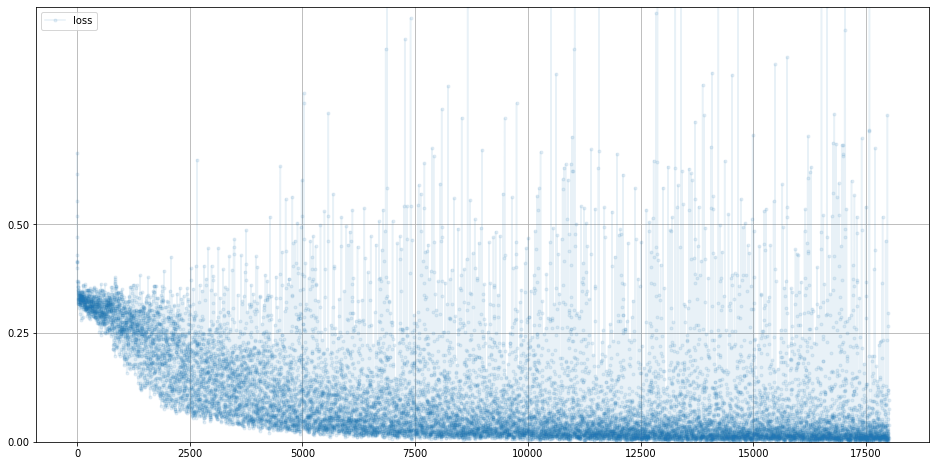

In [16]:
# plot classifer error

C.plot_progress()

In [17]:
# Load MNIST Test Data

mnist_test_dataset = MnistDataset("mount/My Drive/Colab Notebooks/make-your-firstGAN-with-pytorch/mnist_data/mnist_test.csv")

'\nÏ∂úÎ†• outputÏùÑ Îã®ÏàúÌïú ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌïú ÌõÑ\nÎã§Ïãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎûòÌïëÌï¥ÏÑú\nÎßâÎåÄÎèÑÌëúÎ°ú ÌëúÌòÑÌï®!\n'

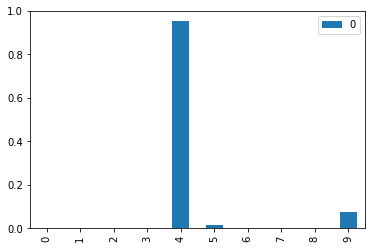

In [18]:
# Visualize the answer given by the neural network

record = 19
image_data = mnist_test_dataset[record][1]

# query form trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend='False', ylim=(0,1))
'''
Ï∂úÎ†• outputÏùÑ Îã®ÏàúÌïú ÎÑòÌååÏù¥ Î∞∞Ïó¥Î°ú Î≥ÄÌôòÌïú ÌõÑ
Îã§Ïãú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú ÎûòÌïëÌï¥ÏÑú
ÎßâÎåÄÎèÑÌëúÎ°ú ÌëúÌòÑÌï®!
'''

<br>

## ÌôúÏÑ±ÌôîÌï®Ïàò

<br>


‚úÖ **ÏãúÍ∑∏Î™®Ïù¥Îìú Ìï®Ïàò**<br>
  : S Î™®ÏñëÏùò Î°úÏßÄÏä§Ìã±Ìï®ÏàòÎäî Ïã†Í≤ΩÎßù Ï¥àÍ∏∞Ïóê ÎßéÏù¥ ÏÇ¨Ïö©Îê®.<br>
  : ÎèôÎ¨ºÏùò Îâ¥Îü∞Ïóê ÏùºÏñ¥ÎÇòÎäî Ïã†Ìò∏ Ï†ÑÎã¨ÌòÑÏÉÅÍ≥º ÎπÑÏä∑ÌïòÍ≥†, Í∏∞Ïö∏Í∏∞Î•º Í≥ÑÏÇ∞ÌïòÍ∏∞Í∞Ä ÏàòÌïôÏ†ÅÏúºÎ°ú ÏÉÅÎãπÌûà Í∞ÑÌé∏
<br>
  ‚ñ∂ Îã®Ï†ê<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: **Ìè¨Ìôî$^{saturation}$**<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Ïã†Í≤ΩÎßù ÌõàÎ†®Ïãú Í∞ÄÏ§ëÏπòÎ•º ÏóÖÎç∞Ïù¥Ìä∏ ÌïòÍ∏∞ÏúÑÌï¥ Í∑∏ÎûòÎîîÏñ∏Ìä∏Î•º Íµ¨ÌïòÎäî Í≥ºÏ†ïÏù¥ ÏûàÎäîÎç∞,<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ïù¥Îïå Í∏∞Ïö∏Í∏∞Í∞Ä ÏÜåÏã§(gradient vanishing)Îê† Ïàò ÏûàÏùå!

  <br>


‚úÖ **Ï†ïÎ•òÏÑ†Ìòï Ïú†Îãõ$^{rectified-linear-unit}$ (ReLU)**<br>
  : S Î™®ÏñëÏùò Î°úÏßÄÏä§Ìã±Ìï®ÏàòÎ•º ÎåÄÏ≤¥ÌïòÎäî Ìï®Ïàò
<br>
  ‚ñ∂ Îã®Ï†ê<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: 0Î≥¥Îã§ ÏûëÏùÄ Í∞íÎì§Ïóê ÎåÄÌï¥ÏÑúÎäî Í≤ΩÏÇ¨Í∞Ä 0Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Ïù¥Ïóê Îî∞Îùº Í∏∞Ïö∏Í∏∞Í∞Ä ÏÜåÏã§ÎêòÎäî Î¨∏Ï†úÍ∞Ä Ïó¨Ï†ÑÌûà Î∞úÏÉù!<br>

  <br>

‚úÖ **Î¶¨ÌÇ§ ReLU$^{leaky-ReLU}$**<br>
  * ReLU Ìï®ÏàòÎ•º Î≥¥ÏôÑÌïú ÏÜêÏã§Ìï®Ïàò<br>
  * 0Î≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞ÏóêÎäî, **ÎØ∏ÏÑ∏Ìïú Í∏∞Ïö∏Í∏∞**Î•º ÌóàÏö©<br>

```
# How to use leaky ReLU function in Neural Network Layer

self.model = nn.Sequential(
  nn.Linear(784,200)
  nn.LeakyReLU(0.02)
  nn.Linear(200,10)
  nn.LeakyReLU(0.02)
)

```

&nbsp;&nbsp;‚Ü™ Ïó¨Í∏∞ÏÑú, 0.02Îäî Ìï®ÏàòÏùò ÏôºÏ™Ω Î∂ÄÎ∂ÑÏóê ÎåÄÌïú Í∏∞Ïö∏Í∏∞Î•º ÏùòÎØ∏


<br>

‚û° ÏÉÅÎã® Î∂ÑÎ•òÍ∏∞ ÌÅ¥ÎûòÏä§ÏóêÏÑú ÌôúÏÑ±Ìôî Ìï®ÏàòÎßå MSELoss()ÏóêÏÑú BCELoss()Î°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏûê!

In [20]:
%%time

# Ïã†Í≤ΩÎßù ÏÉùÏÑ±
C = Classifier()


# MNIST Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌõàÎ†® ÏßÑÌñâ
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 3min 44s, sys: 2.43 s, total: 3min 46s
Wall time: 3min 46s


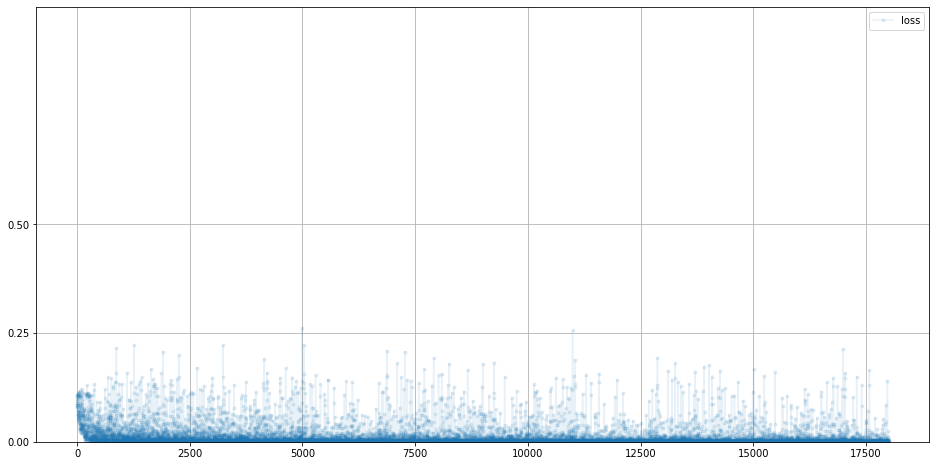

In [21]:
# plot classifer error

C.plot_progress()

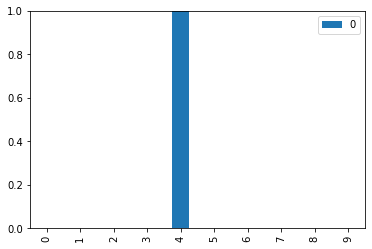

In [22]:
# Visualize the answer given by the neural network

record = 19
image_data = mnist_test_dataset[record][1]

# query form trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend='False', ylim=(0,1))

<br>

## ÏòµÌã∞ÎßàÏù¥Ï†Ä

‚úÖ **SGD$^{Stochastic-Gradient-Descent}$, ÌôïÎ•†Ï†Å Í≤ΩÏÇ¨ÌïòÍ∞ïÎ≤ï**<br>
  ‚ñ∂ Îã®Ï†ê<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Íµ≠ÏÜå ÏµúÏ†ÅÌï¥Ïóê Îπ†Ïßà Ïàò ÏûàÏùå.<br>
  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Î™®Îì† ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞Ïóê Îã®ÏùºÌïú ÌïôÏäµÎ•†ÏùÑ Ï†ÅÏö©Ìï®.<br>

  <br>

‚úÖ **Adam$^{Adaptive-Moment-Estimation}$**<br>
  : Í¥ÄÏÑ±ÏùÑ Ïù¥Ïö©Ìï¥ Íµ≠ÏÜå ÏµúÏ†ÅÌï¥Î°ú Îπ†Ï†∏Î≤ÑÎ¶¥ Í∞ÄÎä•ÏÑ±ÏùÑ Ï§ÑÏù¥Îäî ÏòµÌã∞ÎßàÏù¥Ï†Ä.<br>
  : ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞Ïóê ÎåÄÌï¥ **Í∞ÅÍ∞Å Îã§Î•∏ ÌïôÏäµÎ•†**ÏùÑ Ï†ÅÏö©<br>
  : ÌïôÏäµÏùÑ Ìï† Îïå Ïù¥ ÌååÎùºÎØ∏ÌÑ∞Îì§ÏùÑ Í≥ÑÏÜç **ÏÉÅÌô©Ïóê Îî∞Îùº ÏàòÏ†ï**Ìï®.

<br>

> ü¶ã Í∑∏Ïô∏ Ï∞∏Í≥†ÏûêÎ£å<br>
: https://onevision.tistory.com/entry/Optimizer-Ïùò-Ï¢ÖÎ•òÏôÄ-ÌäπÏÑ±-Momentum-RMSProp-Adam<br>
: https://morioh.com/p/3f20600908f3
<br>
<br>
ü¶ã **EMA$^{Exponential-Moving-Average}$**, ÏßÄÏàòÏù¥ÎèôÌèâÍ∑†<br>
: Í∞ÄÏ§ëÎ≥ÄÏàò $Œ±$Î•º Ïù¥Ïö©ÌïòÏó¨ ÏµúÍ∑º ÏàòÏπòÏùò ÏòÅÌñ•Î†•ÏùÄ ÎÜíÏù¥Í≥† Í≥ºÍ±∞ ÏàòÏπòÏùò ÏòÅÌñ•Î†•ÏùÄ ÎÇÆÏ∂îÎäî Í≤É
$${ x_k = {\alpha}p_k + (1-{\alpha})x_{k-1} {\quad} where {\quad} {Œ±}= {2 \over {N+2}}}$$

<br>

```
# Set Optimizer
self.optimizer = torch.optim.Adam(self.parameters())

```

<br>

‚û° ÏÉÅÎã® Î∂ÑÎ•òÍ∏∞ ÌÅ¥ÎûòÏä§ÏóêÏÑú ÏòµÌã∞ÎßàÏù¥Ï†ÄÎßå SGDÏóêÏÑú AdamÏúºÎ°ú Î≥ÄÍ≤ΩÌï¥Ï£ºÏûê!

In [23]:
%%time

# Ïã†Í≤ΩÎßù ÏÉùÏÑ±
C = Classifier()


# MNIST Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌõàÎ†® ÏßÑÌñâ
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 3min 30s, sys: 2.1 s, total: 3min 32s
Wall time: 3min 32s


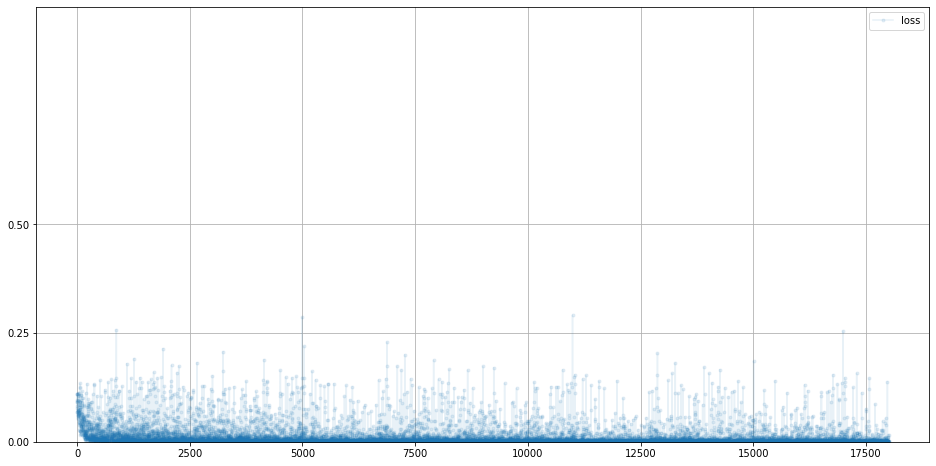

In [24]:
# plot classifer error

C.plot_progress()

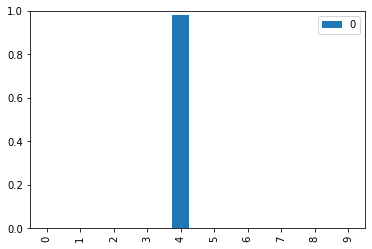

In [25]:
# Visualize the answer given by the neural network

record = 19
image_data = mnist_test_dataset[record][1]

# query form trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend='False', ylim=(0,1))

<br>

## Ï†ïÍ∑úÌôî

<br>

‚úÖ **Ï†ïÍ∑úÌôî$^{normalization}$**<br>
  : ÌååÎùºÎØ∏ÌÑ∞Ïùò Î≤îÏúÑÎ•º Í∞êÏÜåÌïòÍ±∞ÎÇò, ÌèâÍ∑†ÏùÑ 0ÏúºÎ°ú ÎßûÏ∂∞Ï£ºÎäî ÏûëÏóÖ<br>
  : Ïã†Í≤ΩÎßù ÌõàÎ†®ÏùÑ ÏïàÏ†ïÌôîÏãúÌÇ§Îäî Í∏∞Îä•<br>
  &nbsp;&nbsp;&nbsp;&nbsp; ‚Ü™ Ïã†Í≤ΩÎßùÏùò Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôîÌïòÎäî Í≤ÉÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ Ïùº!

```
# How to use LayerNorm in Neural Network Layer

self.model = nn.Sequential(
  nn.Linear(784,200),
  nn.Sigmoid(),

  LayerNorm(200),

  nn.Linear(200,10),
  nn.Sigmoid()
)

```

‚Ü™ Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥Îì§ÏùÑ ÌÜµÍ≥ºÌïòÍ∏∞ Ï†ÑÏóê Ï†ïÍ∑úÌôî ÏûëÏóÖÏùÑ Í±∞Ï≥ê, ÎÑ§Ìä∏ÏõåÌÅ¨ Ïã†Ìò∏Îì§ÏùÑ Î™®Îëê ÌëúÏ§ÄÌôî.

<br>


‚û° ÏÉÅÎã® Î∂ÑÎ•òÍ∏∞ ÌÅ¥ÎûòÏä§ÏóêÏÑú Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥Ïóê LayerNormÏùÑ Ï∂îÍ∞ÄÌï¥Ï£ºÏûê

In [28]:
%%time

# Ïã†Í≤ΩÎßù ÏÉùÏÑ±
C = Classifier()


# MNIST Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌõàÎ†® ÏßÑÌñâ
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 3min 42s, sys: 2.11 s, total: 3min 44s
Wall time: 3min 44s


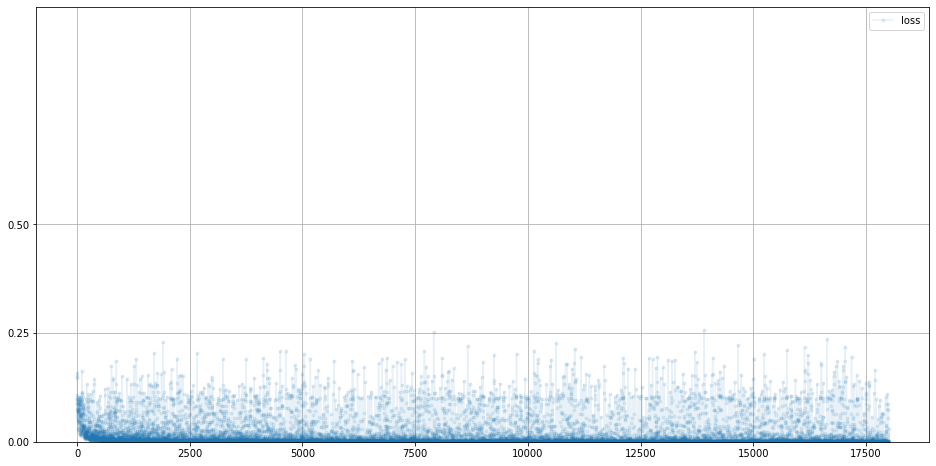

In [29]:
# plot classifer error

C.plot_progress()

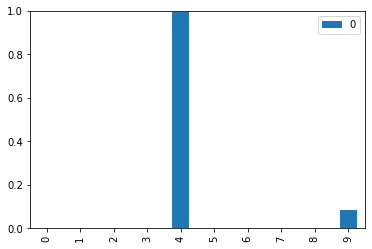

In [30]:
# Visualize the answer given by the neural network

record = 19
image_data = mnist_test_dataset[record][1]

# query form trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend='False', ylim=(0,1))

<br>

## Î≥µÌï©Ï†Å ÏÑ±Îä• Ìñ•ÏÉÅ Í∏∞Î≤ï

‚û° ÏÉÅÎã® Î∂ÑÎ•òÍ∏∞ ÌÅ¥ÎûòÏä§ÏóêÏÑú Ïã†Í≤ΩÎßù Î†àÏù¥Ïñ¥Ïóê ÏïÑÎûòÏùò Í≤ÉÎì§ÏùÑ Î™®Îëê Ï†ÅÏö©ÌïòÏó¨ Ï£ºÏûê!
* BCELoss
* LeakyReLU
* Adam
* LayerNorm

&nbsp;&nbsp;&nbsp;&nbsp; ‚Ü™ Ïù¥Îïå, BCE ÏÜêÏã§Í∞ôÏùÄ Í≤ΩÏö∞ 0Í≥º 1ÏÇ¨Ïù¥ Ïô∏Ïùò Í∞íÏùÄ Î∞õÏùÑ Ïàò ÏóÜÎäîÎç∞, Leaky ReLUÏóêÏÑúÎäî Í∑∏Ïô∏Ïùò Í∞íÎì§Ïù¥ ÎÇòÏò¨ Ïàò ÏûàÏúºÎØÄÎ°ú Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏∏ Ïàò ÏûàÏúºÎØÄÎ°ú Ï£ºÏùò.

In [36]:
%%time

# Ïã†Í≤ΩÎßù ÏÉùÏÑ±
C = Classifier()


# MNIST Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÌõàÎ†® ÏßÑÌñâ
epochs = 3

for i in range(epochs):
  print('training epoch', i+1, 'of', epochs)
  for label, image_data_tensor, target_tensor in mnist_dataset:
    C.train(image_data_tensor, target_tensor)

training epoch 1 of 3
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 3
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 3
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
CPU times: user 10min 54s, sys: 5.6 s, total: 10min 59s
Wall time: 10min 58s


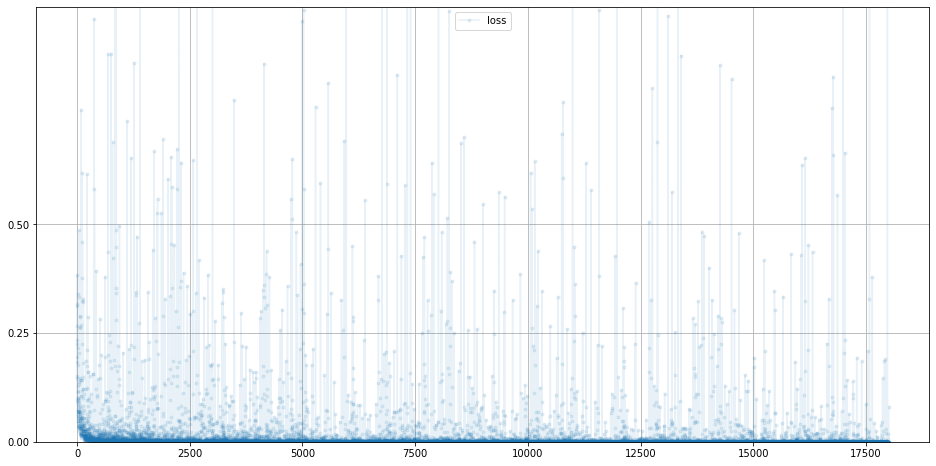

In [37]:
# plot classifer error

C.plot_progress()

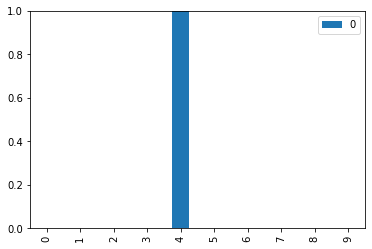

In [38]:
# Visualize the answer given by the neural network

record = 19
image_data = mnist_test_dataset[record][1]

# query form trained network
output = C.forward(image_data)

# plot output tensor
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend='False', ylim=(0,1))

---

## **Summary**
>* ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Î•º Îã§Î£®Í±∞ÎÇò ÏÉàÎ°úÏö¥ ÏõåÌÅ¨ÌîåÎ°úÏö∞Î•º ÎßåÎì§ Îïå,<br>
Îç∞Ïù¥ÌÑ∞Î•º ÎØ∏Î¶¨ ÏÇ¥Ìé¥Î≥¥Í≥† Ï†úÎåÄÎ°ú Î°úÎî©ÎêòÏóàÎäîÏßÄ, ÌòπÏùÄ Î≥ÄÌôòÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùÄ ÏäµÍ¥Ä!
* ÌååÏù¥ÌÜ†ÏπòÎäî Î®∏Ïã†Îü¨Îãù ÌõàÎ†® Ïãú ÎßéÏùÄ ÏûëÏóÖÏùÑ ÎåÄÏã† ÏàòÌñâÌï¥Ï§å!<br>
ÏòàÎ•º Îì§Ïñ¥, Ïã†Í≤ΩÎßùÏùÄ ÌååÏù¥ÌÜ†ÏπòÏùò **nn.Module ÌÅ¥ÎûòÏä§**Î°úÎ∂ÄÌÑ∞ ÏãúÏûëÌïòÎ©¥ Îê®!
<br>
<br>
* ÌõàÎ†®Ïù¥ Ïñ¥ÎñªÍ≤å ÎêòÏñ¥Í∞ÄÍ≥† ÏûàÎäîÏßÄ **ÏÜêÏã§Í∞í**ÏùÑ ÏãúÍ∞ÅÌôîÌïòÎäî Í≤ÉÏù¥ Ï¢ãÏùå!
<br>
<br>
<br>
* **ÌèâÍ∑†Ï†úÍ≥±Ïò§Ï∞® ÏÜêÏã§** => **ÌöåÍ∑Ä**Î¨∏Ï†úÏóê Ï†ÅÌï©<br>
  **Ïù¥ÏßÑ ÍµêÏ∞® ÏóîÌä∏Î°úÌîº** => **Î∂ÑÎ•ò**Î¨∏Ï†úÏóê Ï†ÅÌï©
  <br>
<br>
<br>
* Ï†ÑÌÜµÏ†ÅÏù∏ **ÏãúÍ∑∏Î™®Ïù¥Îìú ÌôúÏÑ±Ìôî Ìï®Ïàò**<br>
  => ÌÅ∞ ÏûÖÎ†•Í∞íÏóê ÎåÄÌï¥ **Í∏∞Ïö∏Í∏∞ ÏÜåÏã§**Î¨∏Ï†úÍ∞Ä ÏùºÏñ¥ÎÇ† Ïàò ÏûàÏùå.<br>
  => Ïù¥Îäî Ïã†Í≤ΩÎßù ÌõàÎ†® Ïãú, ÏïΩÌïú Ïó≠Ï†ÑÌåå Ïã†Ìò∏Î°ú Í∑ÄÏ∞©Îê† Ïàò ÏûàÏùå.<br>
* **ReLU ÌôúÏÑ±Ìôî Ìï®Ïàò**<br>
  => ÏñëÏùò ÏûÖÎ†•Ïóê ÎåÄÌï¥ Ï†ÅÏ†àÌïú Í∏∞Ïö∏Í∏∞Î•º ÏßÄÎãàÍ≤å Ìï®.<br>
  => ÏùåÏùò ÏûÖÎ†•Í∞íÏóê ÎåÄÌï¥ÏÑúÎèÑ ÏïΩÍ∞ÑÏùò Í∏∞Ïö∏Í∏∞Î•º ÏßÄÎãàÍ≤å Ìï®ÏúºÎ°úÏç® Îçî ÎÇòÏùÄ Í≤∞Í≥ºÎ•º Ïú†ÎèÑÌï®.<br>
<br>
<br>
* **Adam ÏòµÌã∞ÎßàÏù¥Ï†Ä**<br>
  => Í¥ÄÏÑ±ÏùÑ Ïù¥Ïö©Ìï¥ Íµ≠ÏÜåÏµúÏ†ÅÌï¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï®.<br>
  => Í∞Å ÌïôÏäµ ÌååÎùºÎØ∏ÌÑ∞ÎßàÎã§ Îã§Î•∏ ÌïôÏäµÎ•†ÏùÑ Ï†ÅÏö©.<br>
  (ÎßéÏùÄ ÏûëÏóÖÏóê ÎåÄÌï¥ ÎåÄÏ≤¥Ï†ÅÏúºÎ°ú SGD ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ≥¥Îã§ ÎÇòÏùÄ ÏÑ±Îä•ÏùÑ Î≥¥Ïó¨Ï§å)<br>
<br>
<br>
* **Ï†ïÍ∑úÌôî**<br>
  => Ïã†Í≤ΩÎßù ÌõàÎ†®ÏùÑ ÏïàÏ†ïÌôîÏãúÌÇ¥.<br>
  => Ïã†Í≤ΩÎßùÏùò Ï¥àÍ∏∞ Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôîÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†Å.<br>
  => **LayerNorm**ÏùÑ ÌÜµÌï¥ Ïã†Í≤ΩÎßùÏùò Ïã†Ìò∏Î•º Ï†ïÍ∑úÌôî -> Îçî ÎÇòÏùÄ ÏÑ±Îä•ÏúºÎ°ú Ïù¥Ïñ¥Ïßê
<br>
<br>


---